In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('data (2).csv')

In [3]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

,count,mean,std,min,25%,50%,75%,max
Age,400.0,31.7050,12.139043,15.0,22.0,28.0,40.0,77.0
Duration,400.0,1.6100,0.770964,1.0,1.0,1.0,2.0,3.0
Frequency,400.0,2.3650,1.675947,1.0,1.0,2.0,4.0,8.0
Location,400.0,0.9725,0.268186,0.0,1.0,1.0,1.0,2.0
Character,400.0,0.9775,0.277825,0.0,1.0,1.0,1.0,2.0
Intensity,400.0,2.4700,0.768490,0.0,2.0,3.0,3.0,3.0
Nausea,400.0,0.9875,0.111242,0.0,1.0,1.0,1.0,1.0
Vomit,400.0,0.3225,0.468019,0.0,0.0,0.0,1.0,1.0
Phonophobia,400.0,0.9775,0.148489,0.0,1.0,1.0,1.0,1.0
Photophobia,400.0,0.9800,0.140175,0.0,1.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [6]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Age': [30 50 53 45 49 27 24 23 48 51 34 20 40 56 44 46 25 38 35 17 36 31 67 22
 68 43 41 37 26 54 16 33 70 28 29 69 21 64 32 52 47 39 57 58 42 77 18 59
 55 19 15]
Unique values in column 'Duration': [1 3 2]
Unique values in column 'Frequency': [5 1 2 8 7 6 4 3]
Unique values in column 'Location': [1 2 0]
Unique values in column 'Character': [1 2 0]
Unique values in column 'Intensity': [2 3 1 0]
Unique values in column 'Nausea': [1 0]
Unique values in column 'Vomit': [0 1]
Unique values in column 'Phonophobia': [1 0]
Unique values in column 'Photophobia': [1 0]
Unique values in column 'Visual': [1 2 4 0 3]
Unique values in column 'Sensory': [2 1 0]
Unique values in column 'Dysphasia': [0 1]
Unique values in column 'Dysarthria': [0 1]
Unique values in column 'Vertigo': [0 1]
Unique values in column 'Tinnitus': [0 1]
Unique values in column 'Hypoacusis': [0 1]
Unique values in column 'Diplopia': [0 1]
Unique values in column 'Defect': [0 1]
Unique values in column

In [7]:
# checking for some null, missing or NaN values
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

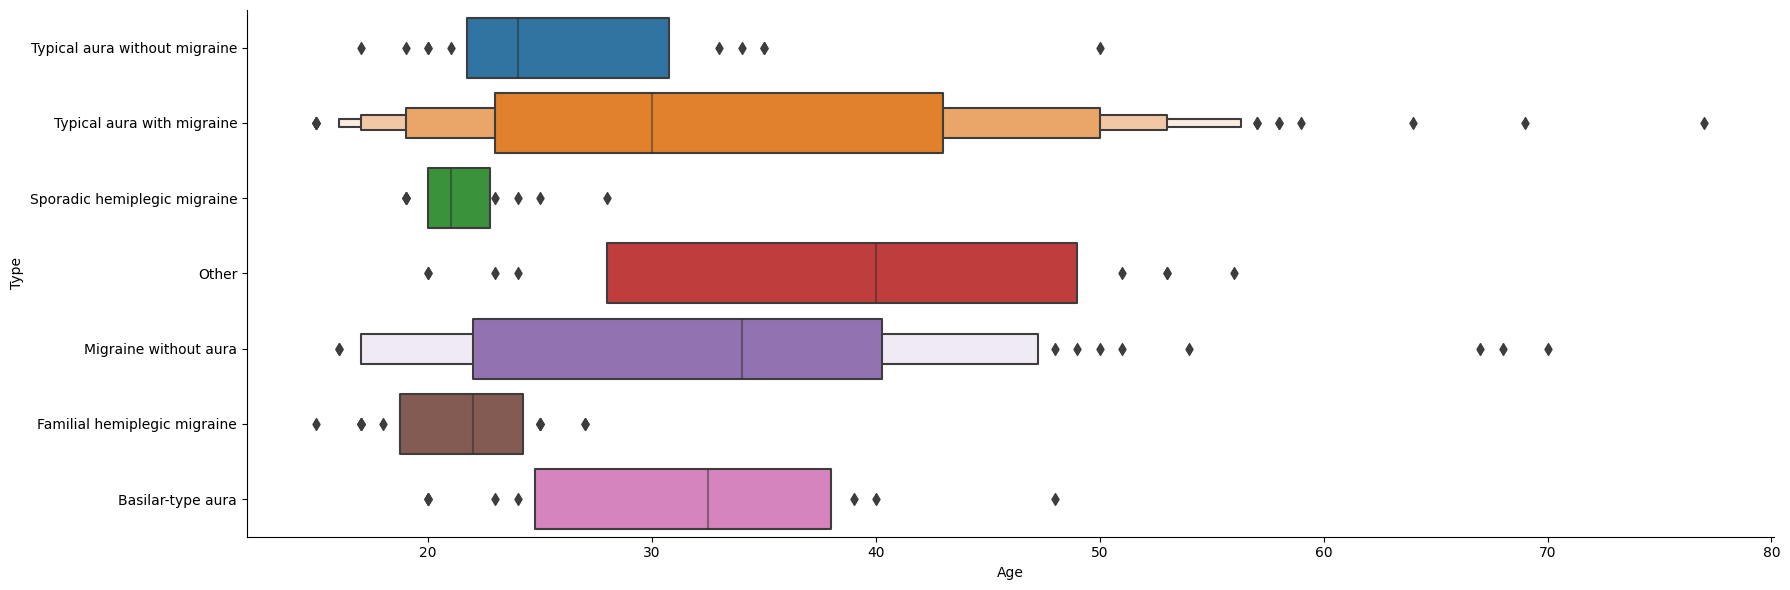

In [8]:
# cgecking for some outliers in dataset
sns.catplot(y='Type', x='Age', data=df.sort_values("Type", ascending=False),
           kind='boxen', height=6, aspect=3)

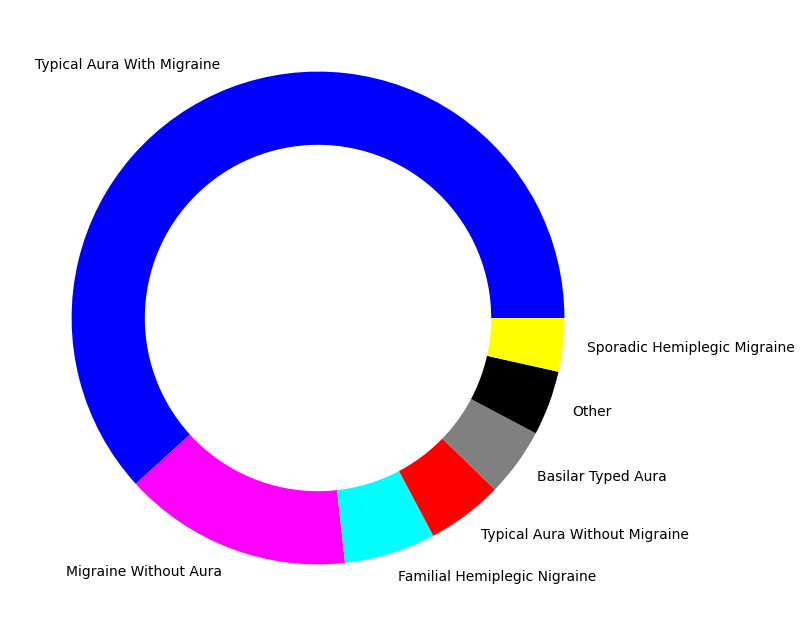

In [9]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

In [10]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = df[df['Type'] == 'Typical aura with migraine']
data_2 = df[df['Type'] == 'Migraine without aura']
data_3 = df[df['Type'] == 'Familial hemiplegic migraine']
data_4 = df[df['Type'] == 'Typical aura without migraine']
data_5 = df[df['Type'] == 'Basilar-type aura']
data_6 = df[df['Type'] == 'Other']
data_7 = df[df['Type'] == 'Sporadic hemiplegic migraine']

In [11]:
df.shape

(400, 24)

In [12]:
400 / 7

57.142857142857146

In [13]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=200, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=200, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=200, 
                           random_state=123, replace=True)


df = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, 
                          data_5_resample, data_6_resample, data_7_resample])


df.head(3)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [14]:
df.shape

(1447, 24)

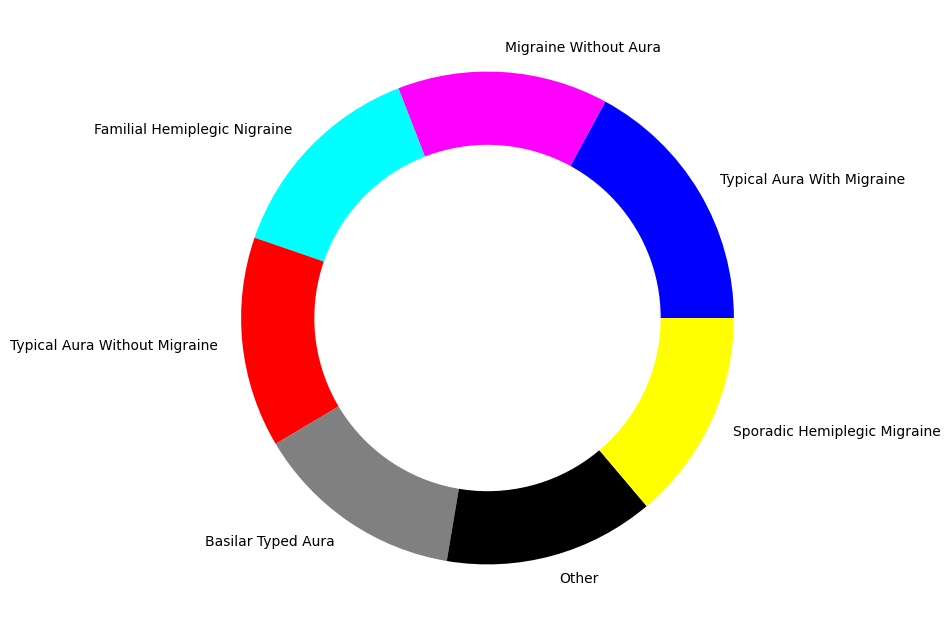

In [15]:
# viewing the sample distribution of classes again

plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

In [16]:
df['Type'] = df['Type'].replace({'Typical aura with migraine': 1, 'Migraine without aura': 2, 'Basilar-type aura': 3, 'Sporadic hemiplegic migraine': 4, 'Familial hemiplegic migraine': 5, 'Other': 6, 'Typical aura without migraine': 7})


<Axes: >

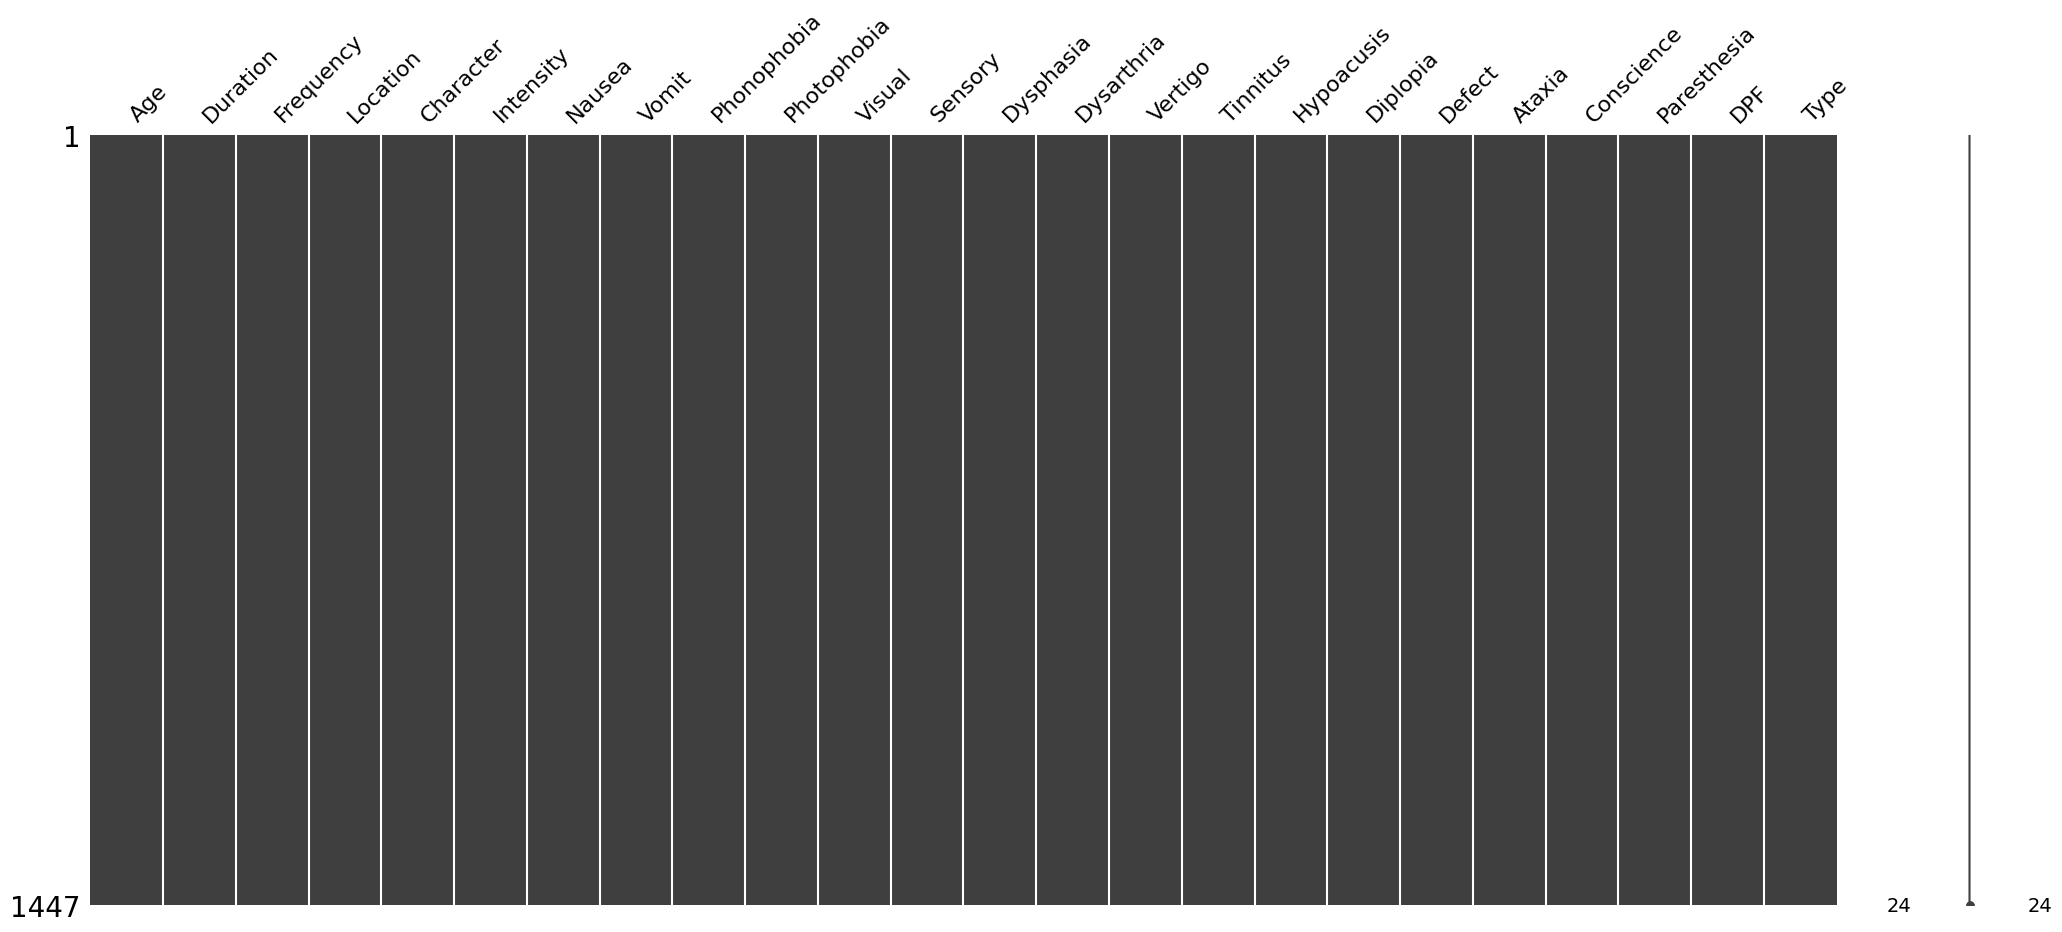

In [17]:
msno.matrix(df)

                 Type
Age         -0.116306
Duration    -0.009546
Frequency   -0.137873
Location    -0.275122
Character   -0.247558
Intensity   -0.504071
Nausea      -0.218774
Vomit        0.030158
Phonophobia -0.303846
Photophobia -0.281937
Visual       0.332157
Sensory      0.216938
Dysphasia    0.082034
Dysarthria   0.003989
Vertigo      0.250793
Tinnitus     0.135521
Hypoacusis  -0.107142
Diplopia    -0.053746
Defect      -0.092914
Ataxia            NaN
Conscience  -0.024697
Paresthesia -0.068702
DPF          0.283728
Type         1.000000


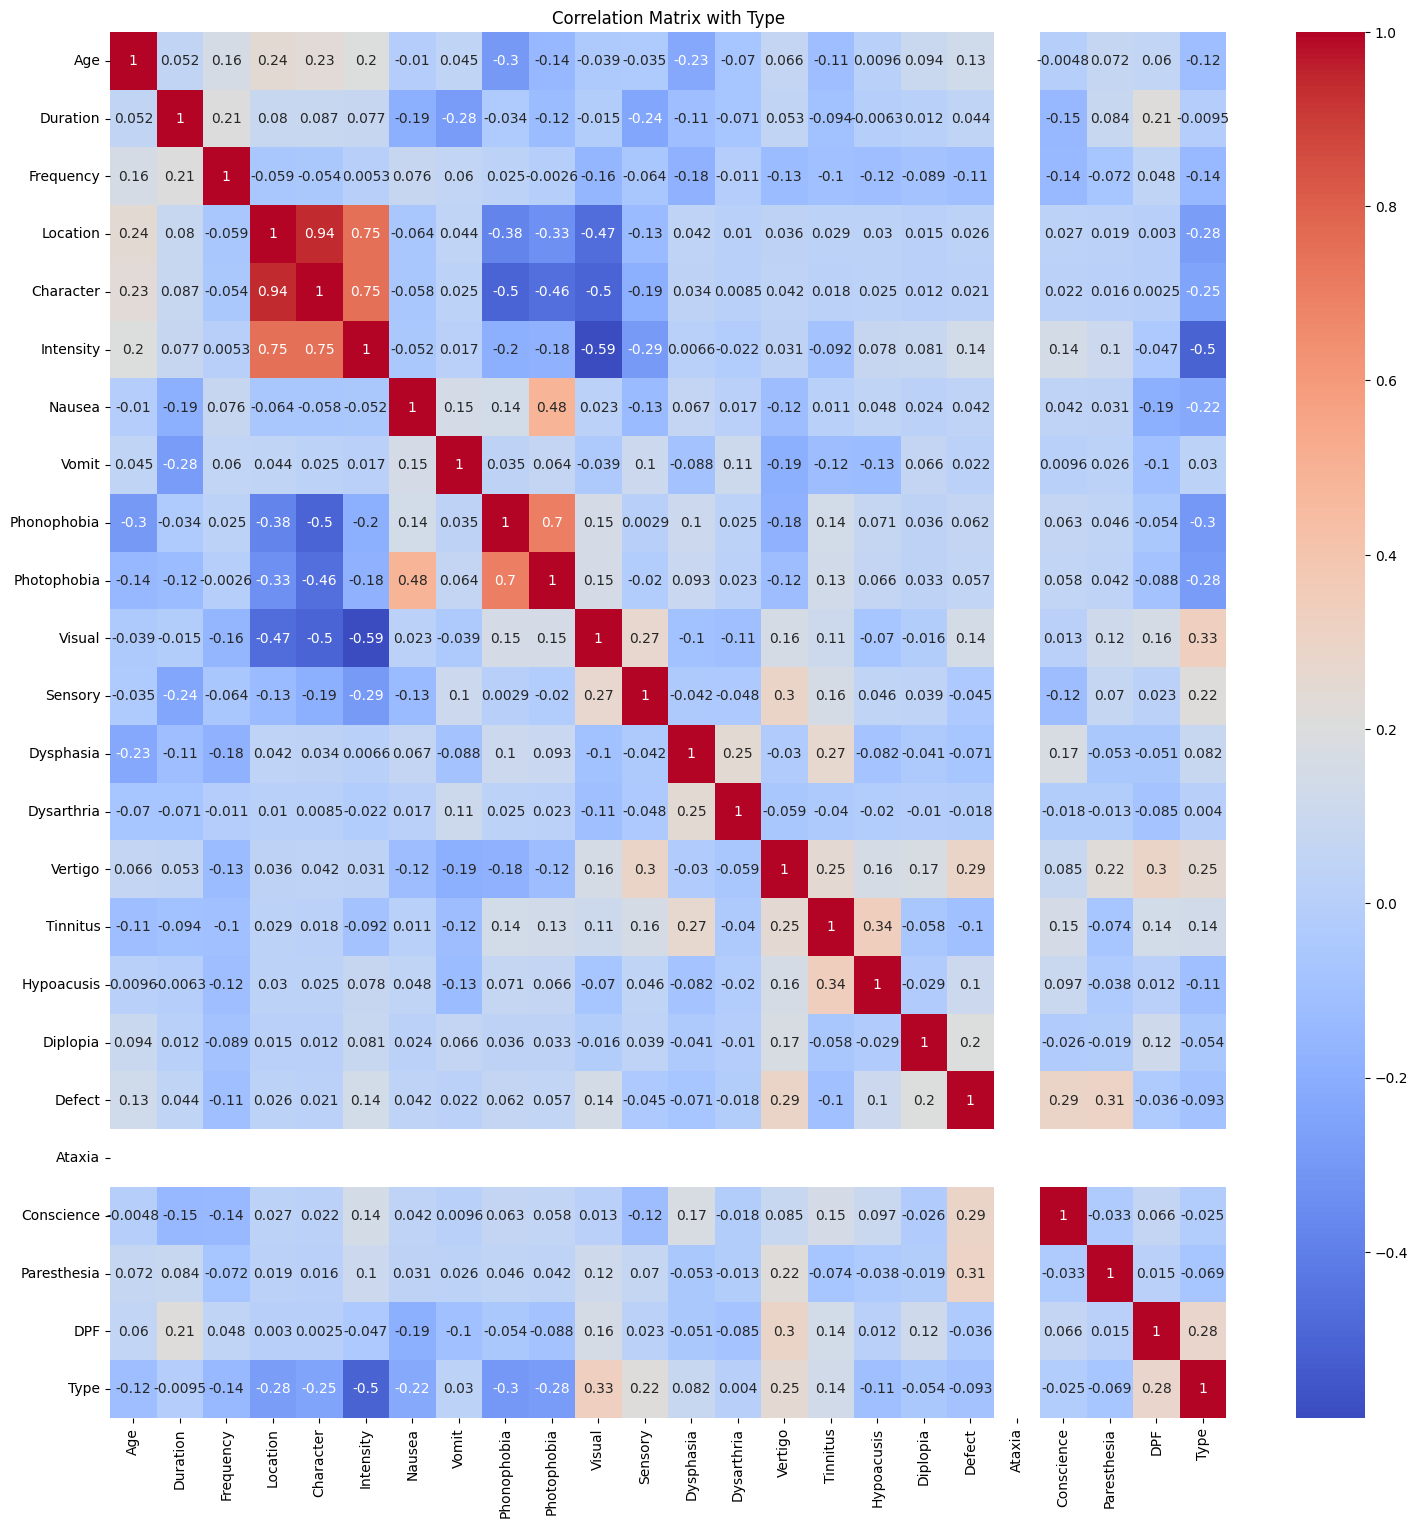

In [18]:
#msno.matrix(df)

chosen_column = "Type" 

# for col in df.columns:
#     if col != chosen_column:
#         plt.scatter(df[chosen_column], df[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = df.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [19]:
print(df["Ataxia"])

print(df["Ataxia"].describe())

0      0
1      0
2      0
3      0
4      0
      ..
344    0
219    0
340    0
342    0
341    0
Name: Ataxia, Length: 1447, dtype: int64
count    1447.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Ataxia, dtype: float64


In [20]:
# y = np.arange(1, df.shape[0]+1) 
# plt.scatter(df["Age"], y) 
# plt.xlabel = "receipt_value"
# plt.show()

In [21]:
# df['zscore'] = ( df.Age - df.Age.mean() ) / df.Age.std()
# df.head()

In [22]:
# df = df[(df.zscore>-3) & (df.zscore<3)]
# df.head()

In [23]:
# y = np.arange(1, df.shape[0]+1) 
# plt.scatter(df["Age"], y) 
# plt.xlabel = "receipt_value"
# plt.show()

In [24]:
del df["Ataxia"]
# del df["zscore"]

In [25]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
X

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,19,1,2,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
219,25,2,2,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
340,21,1,1,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
342,19,1,2,1,1,2,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [27]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
63    1
64    1
65    1
66    1
Name: Type, dtype: int64

In [28]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [45]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

AttributeError: 'Series' object has no attribute 'append'

In [46]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [47]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [48]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [50]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [51]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [52]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 92.64367816091954
K Nearest neighbors: 72.8735632183908
Support Vector Classifier: 92.41379310344827
Naive Bayes: 87.35632183908046
Decision tree: 98.39080459770115
Random Forest: 99.3103448275862


In [53]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

RandomForestClassifier()

In [54]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  0,  1,  0,  1,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  0, 54]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

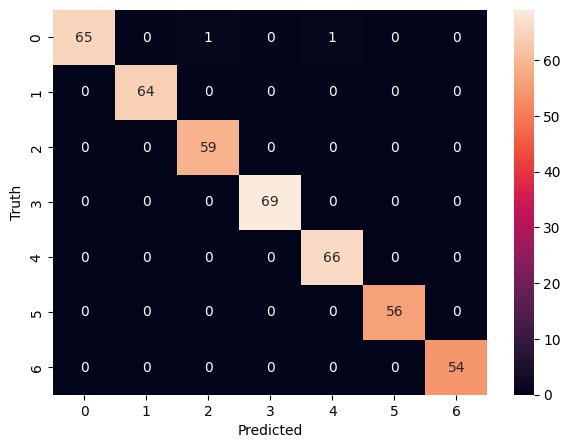

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        67
           2       1.00      1.00      1.00        64
           3       0.98      1.00      0.99        59
           4       1.00      1.00      1.00        69
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        54

    accuracy                           1.00       435
   macro avg       1.00      1.00      1.00       435
weighted avg       1.00      1.00      1.00       435



In [57]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()